In [1]:
# !pip install googletrans
# !pip install googletrans==3.1.0a0

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from string import punctuation
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator
import time

warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def preprocess_text(text):
    stopwords_and_punctuation = set(stopwords.words('english')) | set(punctuation)
    stemmer = SnowballStemmer("english")

    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if word not in stopwords_and_punctuation]

    return text

In [3]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/book/Hinglish_Dataset.csv")
df.head(-1)

,Id,Comment,Review
0,1,Umda shot! 😍,1
1,2,Yeh tasveer pasand hai! ❤️,1
2,3,Zabardast content! 👌,1
3,4,Shandar post! 😊,1
4,5,Khoobsurat capture!,1
...,...,...,...
1151,1152,Hamesha awesome lagti ho.,1
1152,1153,Meri sabse sundar titli.,1
1153,1154,Achha result.,1
1154,1155,Achha utpad.,1


In [4]:
print("Dataset Information:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1157 non-null   int64 
 1   Comment  1157 non-null   object
 2   Review   1157 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 27.2+ KB

Missing Values:
Id         0
Comment    0
Review     0
dtype: int64


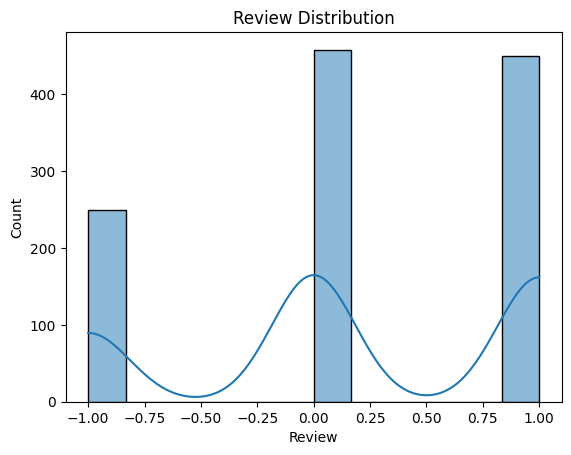

In [5]:
sns.histplot(df['Review'], kde=True).set_title("Review Distribution")
plt.show()

In [6]:
translator = Translator(service_urls=['translate.googleapis.com'])

# Translate Hinglish comments to English
df['Comment_English'] = df['Comment'].apply(lambda x: translator.translate(x, src='hi', dest='en').text)
df.head(10)

In [ ]:
df['Comment_Cleaned'] = df['Comment_English'].apply(lambda x: ' '.join(preprocess_text(x)))
df.head(-1)

,Id,Comment,Review,Comment_English,Comment_Cleaned
0,1,Umda shot! 😍,1,Nice shot!,nice shot
1,2,Yeh tasveer pasand hai! ❤️,1,I like this picture!,like pictur
2,3,Zabardast content! 👌,1,Awesome content!,awesom content
3,4,Shandar post! 😊,1,Awesome post!,awesom post
4,5,Khoobsurat capture!,1,Amazing capture!,amaz captur
...,...,...,...,...,...
1151,1152,Hamesha awesome lagti ho.,1,You always look in awe.,alway look awe
1152,1153,Meri sabse sundar titli.,1,My most beautiful butterfly.,beauti butterfli
1153,1154,Achha result.,1,Good result.,good result
1154,1155,Achha utpad.,1,good product.,good product


In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))
# tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Comment_Cleaned'])
y = df['Review']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.78      0.84        69
           0       0.72      0.87      0.78       128
           1       0.87      0.77      0.82       151

    accuracy                           0.81       348
   macro avg       0.83      0.81      0.81       348
weighted avg       0.82      0.81      0.81       348



In [ ]:
new_review = ["main bura huu"]

# Translate the new Hinglish review to English
translated_review = translator.translate(new_review[0], src='hi', dest='en').text
new_review_tokens = ' '.join(preprocess_text(translated_review))
new_review_tokens_transformed = tfidf.transform([new_review_tokens])

def print_sentiment_label(label):
    if label == 1:
        return "Positive"
    elif label == 0:
        return "Negative"
    elif label == -1:
        return "Neutral"
    else:
        return "Unknown"

predicted_label = model.predict(new_review_tokens_transformed)[0]
print("Predicted Sentiment:", print_sentiment_label(predicted_label))

Predicted Sentiment: Negative
